# Using Preprocess Data Structures and Methods

In [1]:
import os
import sys 

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from detector import (
    ShapeType,
    ImageType
)
    
from detector.preprocess import (
    Vertex, Region, Image
)

2022-01-17 15:30:32.754789: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-17 15:30:32.754831: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


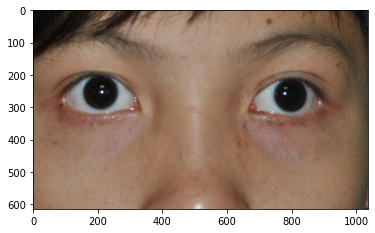

In [2]:
img = Image('../data/raw/patient/exo_000.png')
img.show()

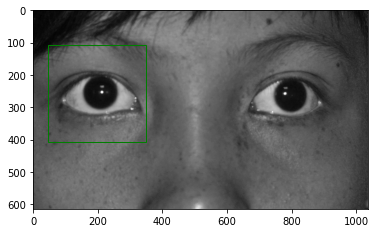

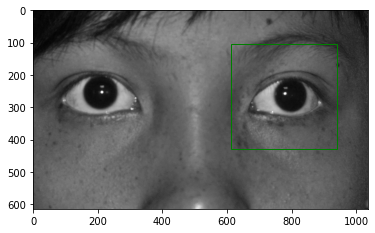

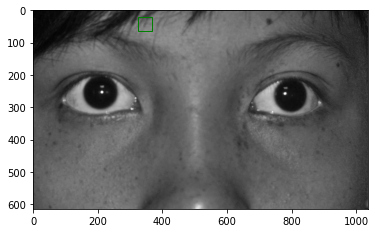

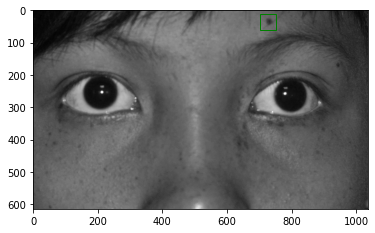

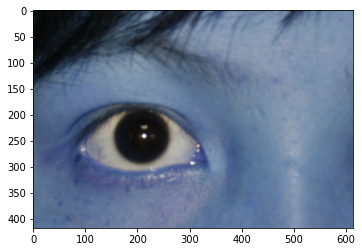

('BGR',
 array([[[  4,   9,   8],
         [  4,   8,   9],
         [  4,   9,  10],
         ...,
         [112, 138, 168],
         [110, 138, 168],
         [112, 140, 170]],
 
        [[  5,   7,   7],
         [  4,   8,   9],
         [  4,   8,   9],
         ...,
         [116, 142, 172],
         [114, 142, 172],
         [114, 142, 172]],
 
        [[  8,  10,  10],
         [  5,   9,  10],
         [  4,   8,   9],
         ...,
         [117, 143, 173],
         [117, 143, 173],
         [115, 143, 173]],
 
        ...,
 
        [[ 83, 111, 145],
         [ 83, 111, 145],
         [ 88, 116, 150],
         ...,
         [ 87, 111, 153],
         [ 83, 107, 149],
         [ 86, 110, 152]],
 
        [[ 85, 113, 147],
         [ 84, 112, 146],
         [ 86, 114, 148],
         ...,
         [ 86, 111, 155],
         [ 83, 108, 152],
         [ 85, 110, 152]],
 
        [[ 89, 116, 150],
         [ 86, 113, 147],
         [ 86, 113, 147],
         ...,
         [ 85, 113, 

In [3]:
img.get_eye_region()

In [4]:
rgb = img.export('RGB')

In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

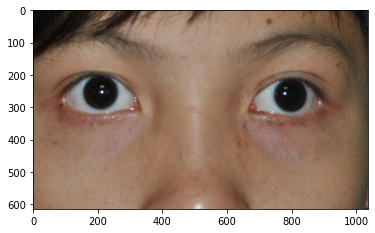

In [6]:
plt.imshow(rgb)
plt.show()

In [7]:
classifier = cv2.CascadeClassifier('../classifiers/haarcascade_eye.xml')

In [8]:
gry = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
eyes = classifier.detectMultiScale(gry)

In [9]:
eyes

array([[ 49, 113, 291, 291],
       [617,  99, 331, 331]], dtype=int32)

In [10]:
img.locate_eye_region()

True

In [14]:
img.eye_region

(45, 12, 940, 430)

In [16]:
img.img_region

(0, 0, 0, 0)

In [18]:
d_w = img.eye_region.width // 10

In [19]:
left = max(0, img.eye_region.left - d_w)
right = min(img.eye_region.right + d_w, img.img_region)

89